In [28]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-15,15,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
#gas_datapath="./"+simtype+"_gas_data_pkl/"
gas_datapath="./"

plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

snap=596 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
snapshot_start=677  #snapshot to begin creating the figure
snapshot_end=678    #snapshot to stop at


############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn="all_clusters_at_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
with open(datapath+fn, "rb") as input:
  initial_cluster_data = pickle.load(input)

clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(initial_cluster_data)):
    m=np.sum(initial_cluster_data[c+1]["mass_tracked"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################


################################
################################
#This section is just to create a list of clusters and display a print like this: These are the clusters groups we have tracked data of:
#['snapshot660_cluster_group1', 'snapshot660_cluster_group2', 'snapshot660_cluster_group3', 'snapshot660_cluster_group4', 'snapshot660_cluster_group5', 
#'snapshot660_cluster_group6', 'snapshot660_cluster_group7', 'snapshot660_cluster_group8', 'snapshot660_cluster_group9', 'snapshot660_cluster_group10']
cluster_groupid=[]
total_clusters=len(initial_cluster_data)
for i in range(total_clusters):
    cluster_groupid.append("snapshot"+str(snapshot_start)+"_cluster_group"+str(i+1))

print("These are the clusters groups we have tracked data of:\n",cluster_groupid)
##############################
##############################
n=snapshot_end-snapshot_start+1 # total no. of snapshots to generate image 

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [494510.7, 473926.06, 336835.7, 222247.42, 210438.16, 197070.44, 154331.2, 137288.03, 178471.55, 137529.62, 161271.97, 131960.11, 179728.95, 162754.95, 127136.336, 136540.34, 121618.77]
These are the clusters groups we have tracked data of:
 ['snapshot677_cluster_group1', 'snapshot677_cluster_group2', 'snapshot677_cluster_group3', 'snapshot677_cluster_group4', 'snapshot677_cluster_group5', 'snapshot677_cluster_group6', 'snapshot677_cluster_group7', 'snapshot677_cluster_group8', 'snapshot677_cluster_group9', 'snapshot677_cluster_group10', 'snapshot677_cluster_group11', 'snapshot677_cluster_group12', 'snapshot677_cluster_group13', 'snapshot677_cluster_group14', 'snapshot677_cluster_group15', 'snapshot677_cluster_group16', 'snapshot677_cluster_group17']


dict_keys(['snaptime', 'face'])


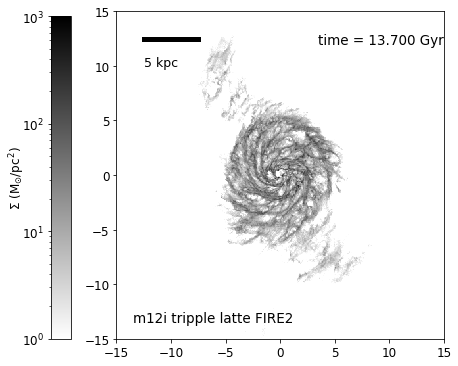

In [33]:
fig1=plt.figure()
fig1.set_size_inches(7,7)
ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height



snapnumber=598
file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
  import_gasdata = pickle.load(input)

print(import_gasdata.keys())

#v=import_gasdata["v"]
face=import_gasdata["face"]
#xh=import_gasdata["xh"]
#yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-15,15,-15,15),cmap='binary') 

#im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-10,10,-10,10),cmap='binary')

#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig1.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
#plot a scale bar 5 kpc long
ax.plot([-12.5,-7.5], [12.5,12.5], 'k-', linewidth=5)
label1 = "5 kpc"
ax.text(-12.5, 10, label1, fontsize=12.5)
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
#label the name of the galaxy on plot 
#label_simname="m12i mhdcv"
#ax.text(10,-23.5,label_simname,fontsize=13.5)
label2="m12i tripple latte "+simtype.upper() 
ax.text(-13.5,-13.5,label2,fontsize=13.5) 

#label the time from the snapshot_times.txt file
label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
ax.text(3.5,12,label3,fontsize=13.5) #display at the top right  
#ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype
#plot_name=simtype+"_gas_and_clusters"+str(plot_count+snapshot_start)+".png"
#fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
#print("Generated the plot and saved the figure as: ",plot_name,end="\r",flush=True)
#print("###################\n")
#plot_count+=1
#fig1.clf()
#plt.tight_layout()
plt.show()
plt.close()

In [17]:
print(len(face))

499
